<h3>Stool microbiome and diabetes </h3>

The microbiome refers to all the microorganisms that live on or within the human body. Microorganisms can be found thriving in many sites of the body, including the skin, uterus, mouth and gastrointestinal tract. In fact it is estimated that there are more bacteria than cells in the human body, thus it is not surprising that some studies have shown the microbiome has a significant impact on physical and even mental health. We have so much interdependence with the bacteria living on or in us, some studies have shown that the species composition of the gut microbiome is associated with many diseases, from cancer to metabolic syndrome. There is crosstalk between our body and the microbiome, our lifestyles and habits can alter the communities of our microbiome; their diversity and composition in turn affect our health.

My graduate research was on microbiology so I am quite interested in the composition of an individual's stool microbiome and their physical status, in this case, whether the person is obsese or not. I am particularly curious about the genus/species of bacteria that the model finds to be important for the prediction.

The dataset I'm using is a human metagenomics dataset from Kaggle which can be found [here](https://www.kaggle.com/antaresnyc/human-metagenomics?select=abundance_stoolsubset.csv).

All credits to the original authors of the study and Kaggle user Alexey Kotlik who uploaded it.

In [1]:
### import packages ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
### import raw data

data = pd.read_csv('metagenomics/abundance_stoolsubset.csv', dtype='str')
cols = data.columns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
# Let's take a look at the raw data

print('sample dimensions are {} rows by {} columns'.format(data.shape[0], data.shape[1]))
print('')
data.head(2)

sample dimensions are 1989 rows by 2339 columns



,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


This dataset is pretty high dimensional with 2339 columns, but most of the columns are not really relevant to what I'm doing. Gender, age and country is available too, which gives me an idea to try something similar to this but see if I can differentiate gender or location based on microbiome. But that'll be something for the future.

Since I'm interested in obesity, I'll filter for that data with indicators of obesity and normal individuals. I got my BMI categories here from [NIH](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm), which is:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Underweight</th>
    <th class="tg-c3ow">&lt;18.5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">Normal</td>
    <td class="tg-c3ow">18.5-24.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Overweight</td>
    <td class="tg-c3ow">25-29.9</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Obesity</td>
    <td class="tg-c3ow">&gt;=30</td>
  </tr>
</tbody>
</table>

In the cell below, I drop the columns which I won't be using, except for some that identifies where the sample is from. I won't be using data from individuals with other diseases, only those who are healthy or obese, so as to not add any confounding variables or other complications in the modeling.

In [118]:
### preprocess data ###

# filter for categories of interest

processed = data[data['disease'].isin(['obesity', 'obese', 'overweight','leaness', 'n'])].copy()

# drop columns that are not needed
to_drop = list(cols[2:4]) + list(cols[8:20]) + list(cols[21:211])
processed.drop(columns = to_drop, inplace = True)

# remove samples without bmi, convert bmi and abundance to float and filter for regular weight and obese
processed = processed[~processed['bmi'].isin(['na', 'nd'])]

processed['bmi'] = pd.to_numeric(processed['bmi'], downcast ='float')

processed.iloc[:, 7:] = processed.iloc[:, 7:].apply(pd.to_numeric)


# create labels for classification

bmi = [(processed['bmi'] >= 18.5) & (processed['bmi'] < 25), (processed['bmi'] >= 25) & (processed['bmi'] < 30), processed['bmi'] >= 30 ]

categories = ['2','3','4']

processed['bmi_category'] = np.select(bmi, categories, default = '1')



After this initial phase of data cleaning, there are some "redundancy" in the relative abdundance data which should be removed. 

The relative abundance for every species is recorded multiple times in the data, as an example, let's look at the data for Archaea bacteria in sample 6 (row 5):

In [54]:
processed.iloc[5, 7:20]

k__Archaea                                                                                                                                                                                      0.4308
k__Archaea|p__Euryarchaeota                                                                                                                                                                     0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                                                                  0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                                                            0.4308
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae                                                                                                     0.4308
k__Ar

The first letter preceding the name of the column is the for taxonomic rank. For example, in the output above, the first row (corresponds to col 7), "k__Archaea", means that for the relative abundance of all bacteria from the kingdom of [Archaea](https://en.wikipedia.org/wiki/Archaea) is 0.4308. For row 2, "k__Archaea|p__Euryarchaeota" is referring to the phylum of Euryarchaeota within the Archaea kingdom. (For more details, see[Bacteria Taxonomy](https://en.wikipedia.org/wiki/Bacterial_taxonomy). Since I'm interested at the species, I'll be removing columns of other taxonomic ranks. Notice that for Methanobrevibacter smithii, there is an even lower rank which starts with "t" which refers to type, however not every species in the dataset has a type, so we'll stick to species level.

We can see that for this sample, only 2 species were detected, *M.smithii* and a unclassified methanobrevibacter, at 0.3816 and 0.04919 abundance respectively. And both values add up to 0.4308, which confirms that I'm not reading the data wrong.

I'll use regex to find column names that contain species level abundance and filter the other columns. And since I'm already filtering at the species level anyways, I'm quite curious to study genus level data as well, so I'll filter for those too. But different species of bacteria within the same genus can have different bioch and life cycles, so it is likely that there is no significant differences. emistry

In [95]:
# get names of all columns that contain abundance data
bacteria = list(processed.columns)[7:-1]

# use regex to select exclusively for columns that contain species level abundance

# filters for species level
s = re.compile(r'(\|s__\w+$)')

# filter for genus level
g = re.compile(r'\|g__\w+$')


not_species = [i for i in bacteria if not s.search(i)]
not_genus = [j for j in bacteria if not g.search(j)]

# drop columns that are not needed
species_data = processed.drop(columns = not_species)

genus_data = processed.drop(columns = not_genus)

In [96]:
print('New dimensions of the dataset:')
print()
print('Species level dataset: {} rows by {} cols'.format(species_data.shape[0], species_data.shape[1]))
print()
print('Genus level dataset: {} rows by {} cols'.format(genus_data.shape[0], genus_data.shape[1]))


New dimensions of the dataset:

Species level dataset: 965 rows by 834 cols

Genus level dataset: 965 rows by 300 cols


The dataset looks to be more manageable now. Let's see if there are any correlation between our classes and the variables

In [131]:
test = species_data.iloc[:, 6:].corr().fillna(0)

<AxesSubplot:>

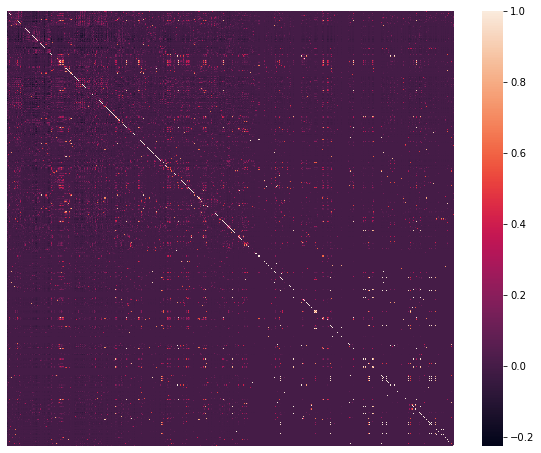

In [133]:
plt.figure(figsize = (10,8))

sns.heatmap(test, xticklabels="", yticklabels="")

In [9]:
species_data.shape

(965, 2136)

In [10]:
multi_class.shape

(965, 2136)

In [6]:
# rename feature names to shorter one

s = re.compile(r's__(\w+)')

short = []

for i in list(species):
    short.append( s.search(i).group(1).replace("_", " "))
    
new = dict(zip(species, short))

processed.rename(columns = new, inplace=True)

Using BMI to separate into obese and normal. Also should note that the bacteria 

The k/p/c is actually the classification category for the bacteria, c = class, g = genus, o = order, f = family, s = species.

So the bacteria species columns contains a lot of redundant data that are correlated, so have to remove them.

e.g. for Archaea, there are multiple columns, k__archaea is actually the total count of all the archaea detected and then p__Euryarchaeota is the sum of all the classes/genus belonging to these classes. 

use RE to filter for the final level, which is species then type, then filter the columns again to cut down on the features.

t__GCT.. is actually the refseq assembly accession number

<span style= 'color:cyan; font-size:18px'>

* More descriptive analysis on the dataset
* Anyone can call a model and run it on data, need more expert opinion and figures
* feature selection: split BMI into 2-4 categories and pick those with highest correlation
    * PCA and pick those with highest values (called loadings apparently, see this: https://aaqr.org/articles/aaqr-20-07-oa-0471)
* use random search CV for hyperparameters
* feature importance on test model


</span>

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score

# shuffle data
#processed = processed.sample(frac=1).reset_index(drop=True)

x = processed.iloc[:, 7:833]

y = processed['label']

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 63)

# scale data based on training set
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


                                                   

#y_test.value_counts()

In [15]:
## Can't remember that this does but seems like it creates dictionary to record feature importance

from collections import Counter

c = Counter(short)

test = dict(c)

dict(sorted(test.items(), key=lambda item: -item[1]))

import csv

with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in test.items():
       writer.writerow([key, value])

In [114]:
def model_performance(model, x, y, n=50):
    ''' does 50 train test splits and calculates model metrics'''
    from sklearn import metrics
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    model.fit(x_train, y_train)
    
    report = metrics.classification_report(y_test, model.predict(x_test), output_dict=True)
    
    report_std = {}
    
    for i in report.keys():
        if i == 'accuracy':
            report_std[i] = []
        else:
            report_std[i] = {}
            for j in report[i].keys():
                report_std[i][j] = []

    
    scoring = ['balanced_accuracy', 'accuracy', 'f1','precision','recall','roc_auc']

    cross_val ={'balanced_accuracy':0, 'accuracy':0, 'f1':0,'precision':0,'recall':0,'roc_auc':0}
        
    cross_val_std ={'balanced_accuracy':[], 'accuracy':[], 'f1':[],'precision':[],'recall':[],'roc_auc':[]}
    
    for count in range(n):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        
        model.fit(x_train, y_train)
        
        test = metrics.classification_report(y_test, model.predict(x_test), output_dict=True)
        
        for i in report.keys():
            if i == 'accuracy':
                report[i] += test[i]
                report_std[i].append(test[i])
            else:
                for j in report[i].keys():
                    report[i][j] += test[i][j]
                    report_std[i][j].append(test[i][j])
       
        for p in scoring:
            scores = cross_val_score(model, x_train, y_train, scoring = p)

            cross_val[p] += np.mean(scores)
            
            cross_val_std[p].append((np.mean(scores)))
            
    
    for i in scoring:
        print(i)
        print('mean: %0.3f' % (cross_val[i]/n))
        print('std dev: %0.3f' % (np.std(cross_val_std[i])))
        print()
        
    for i in report.keys():
        if i == 'accuracy':
            report[i] = report[i]/(n+1)
            report_std[i] = np.std(report_std[i])
        else:
            for j in report[i].keys():
                report[i][j] = report[i][j]/(n+1)
                report_std[i][j] = np.std(report_std[i][j])
        
    return report, report_std


# def model_performance(model, x, y):
#     ''' 20 fold cross val score'''
#     scoring = ['balanced_accuracy', 'accuracy', 'f1','precision','recall','roc_auc']
    
#     for p in scoring:
#         scores = cross_val_score(model, x, y, cv=20, scoring = p)
#         print(p)
#         print('mean: %0.3f' % np.mean(scores))
#         print('std dev: %0.2f' % np.std(scores))
#         print()

In [ ]:
# correlation plot of features

corr = processed.iloc[:, 7:833].corr()
corr.fillna(0, inplace=True)

fig, ax = plt.subplots(1,1, figsize=(12,8))

sns.heatmap(corr, xticklabels = False, yticklabels = False, ax=ax, cmap='viridis')

# plt.tight_layout()

# plt.savefig('correlation_heatmap.png', dpi=200)

In [ ]:
def model_performance(y_true, y_pred):
    '''prints model metrics'''

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

    print(classification_report(y_true, log_pred))
    print('balanced accuracy: {0:.4g}'.format(metrics.balanced_accuracy_score(y_true, log_pred)))



### Log regression ###

In [30]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, norm

#log_params = {'penalty':['l1', 'l2']}

# essentially, the hyperparameter c for regularisation strength will be randomly sampled from a uniform dist between 0 - 5
log_params = dict(C=uniform(loc=0, scale=5), penalty=['l2', 'l1'])

# fit log regression
log_reg = LogisticRegression(max_iter=1000)

# randomized hyperparameter search
log_reg_CV = RandomizedSearchCV(log_reg, log_params, n_iter = 50,  scoring = 'balanced_accuracy').fit(x_train, y_train)

log_reg_CV.best_params_

{'C': 0.15220401184507015, 'penalty': 'l2'}

In [33]:
from sklearn.linear_model import LogisticRegression

# refit model with all training data
log_reg_CV.fit(x_train, y_train)

log_pred = log_reg_CV.predict(x_test)
 

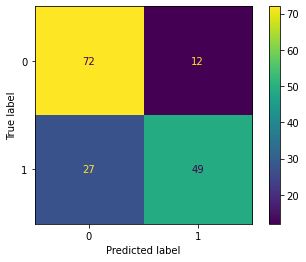

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_cm = confusion_matrix(y_test, log_pred)

ConfusionMatrixDisplay(log_cm).plot()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, log_pred))
print('balanced accuracy: {0:.4g}'.format(metrics.balanced_accuracy_score(y_test, log_pred)))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        84
           1       0.80      0.64      0.72        76

    accuracy                           0.76       160
   macro avg       0.77      0.75      0.75       160
weighted avg       0.76      0.76      0.75       160

balanced accuracy: 0.7509


### Linear SVM ###

In [54]:
#linear SVM

from sklearn.svm import LinearSVC

linsvm_params = {'penalty':['l1','l2'], 'C':uniform(0, 10)}

lin_svm = LinearSVC(max_iter = 500)

linsvm_cv = RandomizedSearchCV(lin_svm, linsvm_params, n_iter = 50, cv=10, scoring = 'balanced_accuracy').fit(x_train, y_train)

linsvm_cv.best_params_

{'C': 0.29560100832948466, 'penalty': 'l2'}

In [57]:
linsvm_cv.fit(x_train, y_train)

lin_svm_pred = linsvm_cv.predict(x_test)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        84
           1       0.80      0.64      0.72        76

    accuracy                           0.76       160
   macro avg       0.77      0.75      0.75       160
weighted avg       0.76      0.76      0.75       160

balanced accuracy: 0.7509


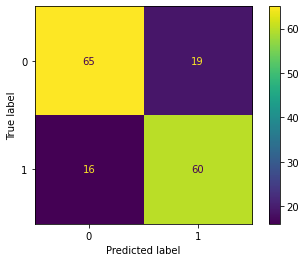

In [59]:
model_performance(y_test, lin_svm_pred)

### Kernel SVM ###

In [ ]:
#step by step optimization

from sklearn.svm import SVC

svm_params = {'kernel':['rbf','sigmoid','poly'], 'gamma':list(np.logspace(-5,5, num=13)), 'C':list(np.logspace(-3,8, num=13))}

svm = SVC(max_iter = 5000)

svm_cv = GridSearchCV(svm, svm_params, scoring = 'balanced_accuracy', n_jobs = 2).fit(x_train, y_train)

svm_cv.best_params_

In [122]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 38.3, gamma = 0.0032)

# model_performance(svm, x_train, y_train)

In [ ]:
report, report_std = model_performance(svm, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [66]:
svm.fit(x_train, y_train)

# print(metrics.classification_report(y_test, svm.predict(x_test)))


SVC(C=38.3, gamma=0.0032)

### Decision Tree ###

from sklearn.tree import DecisionTreeClassifier

tree_params = {'criterion':['gini','entropy'], 'max_depth':[p for p in range(50)[5:]], 'min_samples_leaf':list(np.linspace(0.0001,0.25,num=50)), 
               'max_features':['sqrt','log2','None']}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, tree_params, scoring = 'balanced_accuracy').fit(x_train, y_train)

tree_cv.best_params_

In [126]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 39, max_features = 'sqrt', min_samples_leaf = 0.0001)

# model_performance(tree, x_train, y_train)

In [ ]:
report, report_std = model_performance(tree, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [68]:
tree.fit(x_train, y_train)

# print(metrics.classification_report(y_test, tree.predict(x_test)))


DecisionTreeClassifier(criterion='entropy', max_depth=39, max_features='sqrt',
                       min_samples_leaf=0.0001)

### Random Forest ###

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest_params = {'n_estimators':[i for i in range(110)[10::20]], 'max_depth':[j for j in range(81)[5::15]], 
                 'min_samples_leaf':list(np.linspace(0.001,0.25,num=50)), 'max_features':['sqrt','log2']}

forest_cv = GridSearchCV(forest, forest_params, scoring = 'balanced_accuracy', n_jobs=2).fit(x_train, y_train)

forest_cv.best_params_

forest = RandomForestClassifier(max_features = 'sqrt')

forest_params = {'n_estimators':[i for i in range(80)[65:75]], 'max_depth':[j for j in range(80)[60:75:2]], 
                 'min_samples_leaf':list(np.linspace(0.0001,0.1,num=10))}

forest_cv = GridSearchCV(forest, forest_params, scoring = 'balanced_accuracy').fit(x_train, y_train)

forest_cv.best_params_

In [131]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 65, min_samples_leaf=0.0001, max_features='sqrt', max_depth = 62)

# model_performance(forest, x_train, y_train)

In [ ]:
report, report_std = model_performance(forest, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [70]:
forest.fit(x_train, y_train)

# print(metrics.classification_report(y_test, forest.predict(x_test)))


RandomForestClassifier(max_depth=62, max_features='sqrt',
                       min_samples_leaf=0.0001, n_estimators=65)

### Naive Bayes ###

In [17]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

# model_performance(naive, x_train, y_train)

In [18]:
naive.fit(x_train, y_train)

print(metrics.classification_report(y_test, naive.predict(x_test)))


GaussianNB()

### Adaboost ###

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada_params = {'n_estimators':[i for i in range(150)[100:130]]}

ada_cv = GridSearchCV(ada, ada_params, scoring = 'balanced_accuracy', n_jobs=2).fit(x_train, y_train)

ada_cv.best_params_

In [135]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 117)

# model_performance(ada, x_train, y_train)

In [ ]:
report, report_std = model_performance(ada, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [72]:
ada.fit(x_train, y_train)

# print(metrics.classification_report(y_test, ada.predict(x_test)))


AdaBoostClassifier(n_estimators=117)

### Gradient Boost ###

from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()

grad_params = {'n_estimators':[i for i in range(200)[100:300:20]]}

grad_cv = GridSearchCV(grad, grad_params).fit(x_train, y_train)

grad = GradientBoostingClassifier()

grad_params = {'n_estimators':[i for i in range(200)[125:150:5]], 'max_depth':[i for i in range(16)[3::2]]}

grad_cv = GridSearchCV(grad, grad_params).fit(x_train, y_train)

grad = GradientBoostingClassifier(n_estimators = 145, max_depth = 5)

grad_params = {'max_features':['sqrt','log2','auto','None']}

grad_cv = GridSearchCV(grad, grad_params).fit(x_train, y_train)

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators = 145, max_depth = 5)

# model_performance(grad, x_train, y_train)

In [ ]:
grad = GradientBoostingClassifier()

report, report_std = model_performance(grad, x, y, n=20)

In [ ]:
report

In [ ]:
report_std

In [74]:
grad.fit(x_train, y_train)

# print(metrics.classification_report(y_test, grad.predict(x_test)))


GradientBoostingClassifier(max_depth=5, n_estimators=145)

In [ ]:

fig, ax = plt.subplots(1,2, figsize = (22,12))

#plot ROC curve

metrics.plot_roc_curve(log_reg, x_test, y_test, ax = ax[0], name = "Log Reggression")
metrics.plot_roc_curve(lin_svm, x_test, y_test, ax = ax[0], name = "Linear SVM")
metrics.plot_roc_curve(svm, x_test, y_test, ax = ax[0], name = "kernel SVM")
# metrics.plot_roc_curve(naive, x_test, y_test, ax = ax[0], name = "Naive Bayes")
metrics.plot_roc_curve(tree, x_test, y_test, ax = ax[0], name = "Decision Tree")
metrics.plot_roc_curve(forest, x_test, y_test, ax = ax[0], name = "Random Forest", ls = "-.", color='r', linewidth = 2)
metrics.plot_roc_curve(ada, x_test, y_test, ax = ax[0], name = "Adaboost")
metrics.plot_roc_curve(grad, x_test, y_test, ax = ax[0], name = "Gradient Boosting", ls = '--', color='black', linewidth=2)
ax[0].tick_params(axis='both', labelsize= 14)
ax[0].set_xlabel('False Postive Rate', fontsize = 24)
ax[0].set_ylabel('True Postive Rate', fontsize = 24)
ax[0].text(-0.08, 1.065, "A", fontsize=24, fontweight='bold', va='top', ha='right')
ax[0].legend(fontsize = 14)

#plot precision-recall curve

metrics.plot_precision_recall_curve(log_reg, x_test, y_test, ax = ax[1], name = "Log Reggression")
metrics.plot_precision_recall_curve(lin_svm, x_test, y_test, ax = ax[1], name = "Linear SVM")
metrics.plot_precision_recall_curve(svm, x_test, y_test, ax = ax[1], name = "kernel SVM")
# metrics.plot_precision_recall_curve(naive, x_test, y_test, ax = ax[1], name = "Naive Bayes")
metrics.plot_precision_recall_curve(tree, x_test, y_test, ax = ax[1], name = "Decision Tree")
metrics.plot_precision_recall_curve(forest, x_test, y_test, ax = ax[1], name = "Random Forest", ls = "-.", color='r', linewidth = 2)
metrics.plot_precision_recall_curve(ada, x_test, y_test, ax = ax[1], name = "Adaboost")
metrics.plot_precision_recall_curve(grad, x_test, y_test, ax = ax[1], name = "Gradient Boosting", ls = '--', color='black', linewidth=2)
ax[1].set_xlabel('Recall', fontsize = 24)
ax[1].set_ylabel('Precision', fontsize = 24)
ax[1].legend(loc = 'lower left',fontsize=14)
ax[1].tick_params(axis='both', labelsize= 16)
ax[1].text(-0.08, 1.035, "B", fontsize=24, fontweight='bold', va='top', ha='right')


plt.tight_layout()
plt.savefig('performance',dpi=300)


#always put savefig before show(), if not will save empty image.
plt.show()

### Dataframe of permutation importance of better performing models ###

### Also the plots ###

In [13]:
from sklearn.inspection import permutation_importance

# forest_importance = permutation_importance(forest, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)

# ada_importance = permutation_importance(ada, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)

grad_importance = permutation_importance(grad, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, n_repeats = 100, random_state = 42)

# svm_importance = permutation_importance(svm, x_test, y_test, scoring = 'balanced_accuracy', n_jobs = 2, random_state = 42)


In [47]:
# features = list(processed.columns[7:-1])

In [59]:
# perm_impt = pd.DataFrame(columns = ['Features', 'Forest','Grad', 'Ada', 'SVM'])

# perm_impt['Features'] = features

# perm_impt['Forest'] = forest_importance['importances_mean']

# perm_impt['Ada'] = ada_importance['importances_mean']

# perm_impt['Grad'] = grad_importance['importances_mean']

# perm_impt['SVM'] = svm_importance['importances_mean']

#perm_impt.to_csv('permutation_importance.csv', index=False)

In [60]:
# perm_impt = pd.read_csv('feature_importance.csv')

# forest_impt = list(perm_impt['Features'][perm_impt['Forest'] > 0])

# ada_impt = list(perm_impt['Features'][perm_impt['Ada'] > 0])

# grad_impt = list(perm_impt['Features'][perm_impt['Grad'] > 0])


In [31]:
# feature_count = []

# for model in ['Forest','Grad', 'Ada']:
#     feature_count.append((perm_impt[model] > 0).value_counts()[True])


In [63]:
# from matplotlib_venn import venn2

# forest_impt = list(perm_impt['Features'][perm_impt['Forest'] > 0])
# grad_impt = list(perm_impt['Features'][perm_impt['Grad'] > 0])
# ada_impt = list(perm_impt['Features'][perm_impt['Ada'] > 0])
# svm_impt = list(perm_impt['Features'][perm_impt['SVM'] > 0])


In [ ]:
# x_labels = ['Random Forest','Gradient Boost', 'AdaBoost']

# # Plot the figure.
# fig, ax = plt.subplots(1,1, figsize = (14,10), facecolor = 'white')

# ax = pd.Series(feature_count).plot(kind='bar')
# ax.set_title('No. of Important Features', fontsize = 18, fontweight = 'bold', pad = 10)
# ax.set_xlabel('Classifier', fontsize = 16, fontweight = 'bold', labelpad = 10)
# ax.set_ylabel('Count',  fontsize = 16, fontweight = 'bold', labelpad = 10)
# ax.set_xticklabels(x_labels, rotation = 0, fontsize = 14)

# rects = ax.patches

# # Make some labels.

# for rect, label in zip(rects, feature_count):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
#             ha='center', va='bottom', fontsize = 14)

# plt.savefig('impt_feature_count.png', dpi=150)
    
# plt.show()


In [163]:
diabetes_impt = pd.read_csv('dict_diabetes.csv', names=['features', 'count'])

grad_impt = pd.read_csv('dict_obs.csv', names=['features', 'count'])

cirr_impt = pd.read_csv('dict_cirrhosis.csv', names=['features', 'count'])

In [ ]:
from venn import venn

test = {'Obesity':set(grad_impt['features']), 'Diabetes':set(diabetes_impt['features'])} #, 'Cirrhosis':set(cirr_impt['features'])}

fig, ax = plt.subplots(1,1, figsize = (14,10), facecolor='white')

venn(test, fontsize = 18, legend_loc = 'lower left', ax=ax)

#ax.set_title('Feature Overlap between Classifiers', fontsize = 18, fontweight ='bold', y=0.90)

plt.tight_layout()

plt.savefig('venn_diagram.png', dpi=200)



In [54]:
del test

### Gradient Boost analysis ###

In [6]:

#grad_perm.to_csv('grad_perm_impt.csv', index=False)

grad_perm = pd.read_csv('obs_avg_impt.csv')

In [ ]:
from sklearn.inspection import permutation_importance

from sklearn.ensemble import GradientBoostingClassifier

impt_score = np.zeros((826,))

for i in range(50):
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    grad = GradientBoostingClassifier(n_estimators = 145, max_depth = 5).fit(x_train, y_train)
    
    perm_impt = permutation_importance(grad, x_test, y_test, scoring='balanced_accuracy', n_jobs = 2)
    
    # filter dataset
    
    impt_score += perm_impt['importances_mean']
    
temp1 = pd.DataFrame(columns = ['features','impt'])
    
temp1['features'] = short
temp1['impt'] = impt_score/50
    
temp2 = temp1[temp1['impt'] > 0].copy()
temp2.sort_values(by='impt', ascending=False, inplace=True, ignore_index=True)

In [113]:
temp2[:10]

,features,impt
0,Klebsiella pneumoniae,0.022613
1,Bacteroides intestinalis,0.010920
2,Bacteroides stercoris,0.005639
3,Bacteroides pectinophilus,0.003882
4,Streptococcus thermophilus,0.003866
5,Ruminococcus obeum,0.003856
6,Bacteroides massiliensis,0.003327
7,Sutterella wadsworthensis,0.003230
8,Prevotella copri,0.002498
9,Barnesiella intestinihominis,0.002216


In [115]:
temp2.to_csv('obs_avg_impt.csv', index_label=None)

In [150]:
# dataframe of impt bacteria and permutation importance

# grad_perm = pd.DataFrame(columns = ['Features','importances_mean', 'importances_std'])
# grad_perm['Features'] = species
# grad_perm['importances_mean'] = grad_importance['importances_mean']
# grad_perm['importances_std'] = grad_importance['importances_std']
# grad_perm = grad_perm[grad_perm['importances_mean'] > 0].copy()
# grad_perm.sort_values(by='importances_mean', ascending=False, inplace=True, ignore_index=True)

In [78]:
test = list(temp2[:11]['features'])

test.pop(8)

'Streptococcus australis'

In [80]:
# dataframe with all data including BMI, country etc

stuff = list(processed.columns[:7]) + test + ['label']

grad_stuff = processed[stuff]

In [82]:
# changing labels for control and obese

#grad_stuff = grad_means.copy()

grad_stuff['label'][grad_stuff['label'] == 1] = 'Obese'

grad_stuff['label'][grad_stuff['label'] == 0] = 'Ctrl'

In [89]:
# calculate mean species abundance for each species

means = grad_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

grad_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

grad_means['Bacteria'] = test
grad_means['Ctrl'] = list(means.iloc[0, :10])
grad_means['Obese'] = list(means.iloc[1, :10])

In [123]:
mann = []

for i in test:
    ctrl = grad_stuff[i][grad_stuff['label'] == 'Ctrl']
    fat = grad_stuff[i][grad_stuff['label'] == 'Obese']
    mann.append(sp.stats.mannwhitneyu(ctrl, fat))

In [133]:
mann

[MannwhitneyuResult(statistic=50021.0, pvalue=5.743462986209846e-29),
 MannwhitneyuResult(statistic=56065.0, pvalue=1.0373227210850577e-13),
 MannwhitneyuResult(statistic=53000.5, pvalue=4.4726913092891246e-14),
 MannwhitneyuResult(statistic=54095.0, pvalue=1.7819259764379774e-13),
 MannwhitneyuResult(statistic=74871.0, pvalue=0.0913742088911158),
 MannwhitneyuResult(statistic=56985.0, pvalue=3.5359461021296864e-11),
 MannwhitneyuResult(statistic=76291.5, pvalue=0.3969552609320985),
 MannwhitneyuResult(statistic=54231.0, pvalue=4.563468300691354e-13),
 MannwhitneyuResult(statistic=76269.0, pvalue=0.40894672831154855),
 MannwhitneyuResult(statistic=72018.0, pvalue=0.06459181295598002)]

In [ ]:
ind = np.arange(len(grad_means))

width = 0.4

fig, ax = plt.subplots(figsize = (16,10))

color = ['royalblue', 'orange']
ax.barh(ind, grad_means.Ctrl, width, color = color[1], label = 'Ctrl', edgecolor ='black')
ax.barh(ind + width, grad_means.Obese, width, color = color[0], label = 'Obese', edgecolor ='black')
ax.set(yticks = ind + width/2, yticklabels = grad_means.Bacteria)
#ax.set_title('Mea', fontsize = 18, fontweight='bold', pad=20)
#ax.set_xscale('log')
ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
ax.set_xlabel("Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
ax.legend(loc='lower right', fontsize = 'x-large')
ax.tick_params(axis='both', labelsize = 14)
plt.gca().invert_yaxis()

plt.savefig('Grad_impt_abundance.png', dpi=200, bbox_inches = "tight")

plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(temp2['impt'])

plt.xlabel('Species', fontsize = 16, fontweight = 'bold', labelpad=10)
plt.tick_params(axis='both', labelsize=10)

plt.ylabel('Permutation Importance', fontsize = 16, fontweight = 'bold', labelpad=10)

plt.tight_layout()

plt.savefig('grad_perm_impt_line.png', dpi=200)

In [93]:
test

['Klebsiella pneumoniae',
 'Bacteroides intestinalis',
 'Dorea longicatena',
 'Bacteroides stercoris',
 'Bacteroides pectinophilus',
 'Bacteroides massiliensis',
 'Clostridium sp L2 50',
 'Barnesiella intestinihominis',
 'Streptococcus thermophilus',
 'Ruminococcus obeum']

grad_perm = perm_impt[['Features','Grad']].copy()

grad_perm = grad_perm[grad_perm['Grad'] > 0].copy()

# sort from highest to lowest importance
grad_perm.sort_values(by='Grad', ascending=False, inplace=True, ignore_index=True)

impt_features = grad_perm['Features'].copy()


regex to shorten species names

c = re.compile(r's__(\w+)')

short = []

for i in grad_perm['Features']:
    short.append( c.search(i).group(1).replace("_", " "))
    
grad_perm['Features'] = short


create a list of features we want from the original data
stuff = list(processed.columns[:7]) + list(impt_features) + ['label']

# filter the original dataset

grad_stuff = processed[stuff].copy()

# change bacteria name to be shorter
new = dict(zip(impt_features, short))

grad_stuff.rename(columns = new, inplace=True)

# changing labels for control and obese
grad_stuff['label'][grad_stuff['label'] == 1] = 'Obese'

grad_stuff['label'][grad_stuff['label'] == 0] = 'Ctrl'

# calculate mean species abundance for each species

means = grad_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

grad_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

grad_means['Bacteria'] = short
grad_means['Ctrl'] = list(means.iloc[0, :])
grad_means['Obese'] = list(means.iloc[1, :])

# plots permutation importance and abundance

fig, ax = plt.subplots(1,2, figsize=(16,10))


ax[0].plot(grad_perm['Grad'])
ax[0].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[0].set_ylabel('Permutation importance', fontsize=18, labelpad = 10)
ax[0].tick_params(axis="both", labelsize=14)

ax[1].scatter([range(len(grad_perm))], grad_means['Ctrl'])
ax[1].scatter([range(len(grad_perm))], grad_means['Obese'])
ax[1].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[1].set_ylabel('Species Abundance', fontsize=18, labelpad = 5)
ax[1].tick_params(axis="both", labelsize=14)
ax[1].legend(['Control','Obese'], fontsize = 'xx-large')

plt.tight_layout()
plt.savefig('grad_perm_importance.png', dpi=150)
plt.show()


### Comparison plots for the 11 common ones ###

In [66]:
# this one basically finds the common species in all models
common = [i for i in species if (i in forest_impt) and (i in grad_impt) and (i in ada_impt)]

# this one is to remove the s__ in the species names
c = re.compile(r's__(\w+)')

short = []

for i in common:
    short.append( c.search(i).group(1).replace("_", " "))

In [68]:
# filers the feature importance table to see the 8 common species got what coefficient

common_impt = perm_impt[perm_impt['Features'].isin(common)]

In [69]:
# create a new table from the original table that consists of the 8 common bacteria and the other info

common_only = processed[(list(processed.columns[:7]) + common + ['label'])]

common_only['label'][common_only['label'] == 1] = 'Obese'

common_only['label'][common_only['label'] == 0] = 'Ctrl'

# rename the columns to the shortened bacteria name 
common_only.rename(columns = dict(zip(common_only.columns[7:-1], short)), inplace =True)


# create 2 dataframes with mean and std dev for each species and BMI

means = common_only.groupby(by = 'label').mean().iloc[:,1:]
error = common_only.groupby(by = 'label').std().iloc[:,1:]

In [70]:
#  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

compare_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

compare_means['Bacteria'] = short
compare_means['Ctrl'] = list(means.iloc[0, :])
compare_means['Obese'] = list(means.iloc[1, :])

# compare_means.plot(x = 'Bacteria', y = ['Ctrl', 'Obese'], kind='barh', title = 'All', logx=True, figsize = (14,8), 
#                    xlabel = 'Mean Relative Abundance', ylabel = 'Bacteria', fontsize=14)

In [ ]:
create_summary(common_only, list(common_only['country']))

In [ ]:
create_summary(common_only, ['china'], name= "China", filename = 'china_8_common.png')

In [74]:
# this functions calculates the mean of the relative abundance and plots barcharts. 
# Take note that it uses some variables that were declared earlier, so it is not entirely standalone. No need to remove the categorical stuff
# since groupby removes them

def create_summary(dataframe, group, name = 'Unnamed', filename = ('Unnamed' + '.png'), color = ['royalblue', 'orange']):

    #create new DF with the group of interest
    grouped = dataframe[dataframe['country'].isin(group)].copy()
    
    # create 2 dataframes with mean and std dev for each species and BMI

    g_means = grouped.groupby(by = 'label').mean().iloc[:,1:]
    g_error = grouped.groupby(by = 'label').std().iloc[:,1:]

    #  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

    grouped_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

    grouped_means['Bacteria'] = short
    grouped_means['Ctrl'] = list(g_means.iloc[0, :])
    grouped_means['Obese'] = list(g_means.iloc[1, :])

    ind = np.arange(len(grouped_means))

    width = 0.4

    fig, ax = plt.subplots(figsize = (16,10))


    ax.barh(ind, grouped_means.Obese, width, color = color[0], label = 'Obese')
    ax.barh(ind + width, grouped_means.Ctrl, width, color = color[1], label = 'Ctrl')
    ax.set(yticks = ind + width, yticklabels = grouped_means.Bacteria)
    ax.set_title(name, fontsize = 18, fontweight='bold', pad=20)
    ax.set_xscale('log')
    ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
    ax.set_xlabel("Log Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
    ax.legend(loc='lower right', fontsize = 'x-large')
    ax.tick_params(axis='both', labelsize = 14)
    plt.gca().invert_yaxis()
    
    #plt.savefig(filename, dpi=150, bbox_inches = "tight")
    
    plt.show()

In [ ]:
create_summary(common_only, ['china'], name= "China", filename = 'china_8_common.png')

### Random Forest feature analysis ### 

In [98]:
test = processed.iloc[:, 7:-1].corr()

In [107]:
test.fillna(0, inplace=True)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(test, xticklabels=False, yticklabels =False, cmap = cmap)

In [ ]:
data['dataset_name'].value_counts()

In [44]:
# create dataframe that contains all impt features from random forest model and sort them

forest_perm = perm_impt[['Features','Forest']].copy()

forest_perm = forest_perm[forest_perm['Forest'] > 0].copy()

forest_perm.sort_values(by='Forest', ascending=False, inplace=True, ignore_index=True)

impt_features = forest_perm['Features'].copy()


# regex to shorten species names

c = re.compile(r's__(\w+)')

short = []

for i in forest_perm['Features']:
    short.append( c.search(i).group(1).replace("_", " "))

forest_perm['Features'] = short

# create a list of features we want from the original data
stuff = list(processed.columns[:7]) + list(impt_features) + ['label']

# filter the original dataset

forest_stuff = processed[stuff].copy()

# change bacteria name to be shorter
new = dict(zip(impt_features, short))

forest_stuff.rename(columns = new, inplace=True)

# changing labels for control and obese
forest_stuff['label'][forest_stuff['label'] == 1] = 'Obese'

forest_stuff['label'][forest_stuff['label'] == 0] = 'Ctrl'


In [40]:
# calculate mean species abundance for each species

means = forest_stuff.groupby(by = 'label').mean().iloc[:,1:]

# create a dataframe for mean abundance

forest_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

forest_means['Bacteria'] = short
forest_means['Ctrl'] = list(means.iloc[0, :])
forest_means['Obese'] = list(means.iloc[1, :])



In [ ]:
# dual plot of perm importance and species abundance

fig, ax = plt.subplots(1,2, figsize=(16,10))


ax[0].plot(forest_perm['Forest'])
ax[0].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[0].set_ylabel('Permutation importance', fontsize=18, labelpad = 10)
ax[0].tick_params(axis="both", labelsize=14)

ax[1].scatter([range(35)], forest_means['Ctrl'])
ax[1].scatter([range(35)], forest_means['Obese'])
ax[1].set_xlabel('Species', fontsize=18, labelpad = 10)
ax[1].set_ylabel('Species Abundance', fontsize=18, labelpad = 5)
ax[1].tick_params(axis="both", labelsize=14)
ax[1].legend(['Control','Obese'], fontsize = 'xx-large')

plt.tight_layout()
plt.savefig('forest_perm_importance.png', dpi=150)
plt.show()


In [54]:
# plot barchart

create_summary(forest_stuff, list(forest_stuff['country'].unique()), name='forest')

eu = ['denmark', 'spain', 'sweden', 'germany','france', 'iceland']

# create_summary(forest_stuff, eu, name='forest')

In [55]:
# find the common and different points

# create dataframe of the EU and CN data and obtain their means
eu_only = forest_stuff[forest_stuff['country'].isin(eu)]

cn_only = forest_stuff[forest_stuff['country'].isin(['china'])]

eu_mean = eu_only.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

cn_mean = cn_only.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

eu_mean['ctrl_larger'] = eu_mean['Ctrl'] > eu_mean['Obese']

cn_mean['ctrl_larger'] = cn_mean['Ctrl'] > cn_mean['Obese']

# agreement dataframe

eu_mean['agreement'] = eu_mean['ctrl_larger'] & cn_mean['ctrl_larger']

agreed = eu_mean[['index','agreement']][eu_mean['agreement'] == True].copy()

In [57]:
# common and differences for the EU countries

den = forest_stuff[forest_stuff['country'].isin(['denmark'])]

#france = forest_stuff[forest_stuff['country'].isin(['france'])]

den_mean = den.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

#france_mean = france.groupby(by='label').mean().drop(columns = 'bmi').transpose().reset_index()

den_mean['ctrl_larger'] = den_mean['Ctrl'] > den_mean['Obese']

#france_mean['ctrl_larger'] = france_mean['Ctrl'] > france_mean['Obese']

# agreement dataframe

den_mean['agreement'] = den_mean['ctrl_larger'] & cn_mean['ctrl_larger']

#agreed = eu_mean[['index','agreement']][eu_mean['agreement'] == True].copy()

In [ ]:
#create new DF with the group of interest

# grouped = forest_stuff[ list(agreed['index']) + ['label'] ]

# create 2 dataframes with mean and std dev for each species and BMI

# g_means = grouped.groupby(by='label').mean().iloc[:,:]
# g_error = grouped.groupby(by= 'label').std().iloc[:,:]

#  creates a dataframe with species name, then the mean species abundance for controls and obese groups then plot a barchart

# grouped_means = pd.DataFrame(columns = ['Bacteria','Ctrl','Obese'])

# grouped_means['Bacteria'] = list(grouped.columns[:-1])
# grouped_means['Ctrl'] = list(g_means.iloc[0, :])
# grouped_means['Obese'] = list(g_means.iloc[1, :])

ind = np.arange(len(grouped_means))

width = 0.4

fig, ax = plt.subplots(figsize = (16,10))

color = ['royalblue', 'orange']
ax.barh(ind, grouped_means.Obese, width, color = color[0], label = 'Obese')
ax.barh(ind + width, grouped_means.Ctrl, width, color = color[1], label = 'Ctrl')
ax.set(yticks = ind + width, yticklabels = grouped_means.Bacteria)
ax.set_title('test', fontsize = 18, fontweight='bold', pad=20)
ax.set_xscale('log')
ax.set_ylabel('Species', fontsize = 18, fontweight='bold')
ax.set_xlabel("Log Relative Abundance", fontsize = 18, fontweight = 'bold', labelpad = 20)
ax.legend(loc='lower right', fontsize = 'x-large')
ax.tick_params(axis='both', labelsize = 14)
plt.gca().invert_yaxis()

# #plt.savefig(filename, dpi=150, bbox_inches = "tight")

plt.show()

In [ ]:
eu_mean['label'][eu_mean['agreement']==True]

In [78]:
# let's try comparing importance with abundance

forest_perm['relative_impt'] = forest_perm['Forest'].div(forest_perm['Forest'].sum(), axis=0)